# Problem 2
2a) Extract reviews of any product from ecommerce website like amazon

2b) Perform emotion mining

**Note**: This analysis is for the smartphone "Redmi-9A-Midnight-2GB-32GB".

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import requests #Used to request URL.
from bs4 import BeautifulSoup

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
#%pip install bs4

## Web scrapping for product reviews
**Note**: Reviews from amazon are extracted for the product mentioned above.

In [3]:
# Note: HEADERS field is required to extract amazon reviews since it will not return the reviews
# otherwise thinking that this query is from a robot. This HEADER changes from sys to sys.
# To find out :https://www.whatismybrowser.com/detect/what-is-my-user-agent
HEADERS = ({'User-Agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:95.0)\
           Gecko/20100101 Firefox/95.0',
           'Accept-Language': 'en-US,en;q=0.5'})

In [4]:
url = "https://www.amazon.in/Redmi-9A-Midnight-2GB-32GB/dp/B08697N43G/ref=sr_1_2?keywords=redmi&qid=1641215172&s=electronics&sprefix=red%2Celectronics%2C180&sr=1-2&th=1"
response = requests.get(url,headers=HEADERS)

In [5]:
response # Check response from website.

<Response [200]>

In [6]:
response.text[:1000]

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sl

In [8]:
soup = BeautifulSoup(response.text, 'html.parser')
#print(soup.prettify())

### Extract reviews

In [9]:
# reviews = soup.find_all('div', attrs={'class': 'a-expander-content reviewText review-text-content a-expander-partial-collapse-content'})
reviews = soup.find_all('div', attrs={'data-hook': 'review-collapsed'})

In [10]:
print(reviews)

[<div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>
  Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really good<br/><br/>After one week use<br/>Edit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen.
</span>
</div>, <div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>
  If you are looking for low budget phone this can be a good choice for you.<br/>If you wanna android phone just for day to day work then it's really good.<br/>On playing heavy games it wi

In [11]:
review=[]
for item in reviews:
    item=item.get_text().replace('\n','')
    item=item.strip(' ')
    review.append(item)

In [12]:
print(review)

["Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really goodAfter one week useEdit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen.", "If you are looking for low budget phone this can be a good choice for you.If you wanna android phone just for day to day work then it's really good.On playing heavy games it will hange obviously. Camera is fine at this range. When you start your new device it take some time but later it will work smoothly.Phone is light weight with a good look", "Excellent mobile for daily use @7500/-. Don't belive in negative reviews at all. If course the product parts made in China, entire assembly, software all are of India. Even this mobile

### Extract ratings.

In [13]:
ratings_ext = soup.find_all('i', attrs={'data-hook': 'review-star-rating'})

In [14]:
print(ratings_ext)

[<i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>, <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>, <i class="a-icon a-

In [15]:
rating=[]
for item in ratings_ext:
    item = item.get_text().replace('\n','')
    item = item.strip(' ')
    item = item[0][:3] # for amazon. Depends on how website represents ratings.
    rating.append(float(item))

In [16]:
rating

[1.0, 4.0, 5.0, 5.0, 1.0, 5.0, 4.0, 3.0]

### Tabulate the collected data. 

In [19]:
data=pd.DataFrame()
data['Review'] = review
data['Ratings']= rating

In [20]:
data.head()

,Review,Ratings
0,Both 13 MP and 5MP Camera quality is good. Hav...,1.0
1,If you are looking for low budget phone this c...,4.0
2,Excellent mobile for daily use @7500/-. Don't ...,5.0
3,"If I started to rating it's all features, it w...",5.0
4,Battery is getting drained out quite fast. 7% ...,1.0


## Sentiment analysis

In [21]:
prod_rev = data.copy() #Copy of the processed reviews

In [22]:
# Function to collect words from lexicons (provided as txt files).
def load_lexicon(filename):
    file = open(filename)

    # Throw away lines of the file until just before the data starts
    # In the provided files, the last line before the actual data starts is a blank line
    while file.readline() != '\n':
        pass

    # Pandas will only process the lines from the current file position onwards
    word_list = np.loadtxt(file, dtype='str')

    # Don't forget to close the file when you're done
    file.close()
    return word_list

In [23]:
# Get all the positive, negative and stopwords.
positive_words = load_lexicon('positive-words.txt') 
negative_words = load_lexicon('negative-words.txt')
#stopwords = pd.read_csv('stop.txt').to_numpy().ravel() # Get the list of stopwords from the file provided.

In [24]:
lemmatizer = WordNetLemmatizer() # lemmatization
#ps = PorterStemmer() # uncomment for stemming

corpus = []
for i in range(0, len(prod_rev['Review'])):
    review1 = re.sub('[^a-zA-Z]+', ' ', prod_rev['Review'][i])#remove special characters, numbers, punctuations (except for #)
    review1 = re.sub("[0-9" "]+"," ",review1)
    review1 = review1.lower()
    review1 = review1.split()
    # Note: I have added the lexicon of stopwords provided inside my nltk lexicon folder since I was getting
    # errors while performing the iterations in the next step when I used the txt file.
    review1 = [lemmatizer.lemmatize(word) for word in review1 if not word in stopwords.words('english_custom')]
    #review1 = [ps.stem(word) for word in review if not word in stopwords.words('english_custom')]
    review1 = ' '.join(review1)    
    corpus.append(review1)


In [25]:
corpus[0]

'mp mp camera quality good lot pre installed apps uninstalled required good performance asus zenfone max asus camera quality mah battery option price range goodafter week useedit don buy phone hang lot problem touch screen'

In [26]:
# Function to visualize the the positive and negative words used by Elon Musk:
def make_word_cloud(corpus, sentiment_words=None, sentiments=True):
    if sentiments == True:
        # Make a list of emotion words.
        para = []
        for i in range(len(corpus)):
            para.extend(corpus[i].split(' '))
        word_list_com = ' '.join([w for w in para if w in sentiment_words])   
    else:
        word_list_com = ' '.join(corpus)
    
    # Make the word cloud.
    wordcloud = WordCloud(max_font_size=50, 
                          background_color='white', 
                          colormap='tab10',
                          random_state=42).generate(word_list_com)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Note: Other suitable cmaps: 'gist_earth', 'Dark2', 'viridis', 'jet'

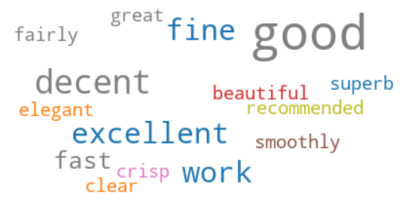

In [27]:
# Wordcloud for positive words.
make_word_cloud(corpus, positive_words)

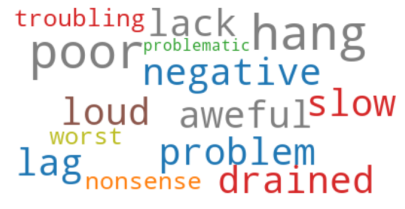

In [28]:
# Wordcloud for negative words.
make_word_cloud(corpus, negative_words)

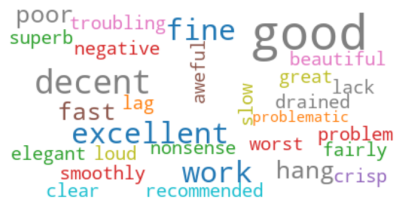

In [29]:
# Wordcloud for all sentiment words used by reviewers.
sentiment_words = np.concatenate((positive_words,negative_words), axis=None) 
make_word_cloud(corpus,sentiment_words)

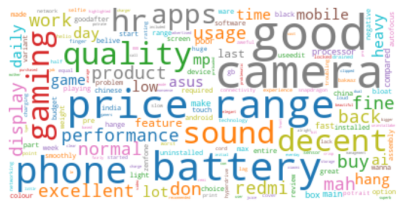

In [30]:
# Wordcloud for all words used by reviewers irrespective of sentiment type.
make_word_cloud(corpus,sentiments=False)

## Conclusion:
- It seems the reviews are polarized and leaning towards negativity. It is hard to tell yet since this is a sample of only 8 reviews that were considered for this exercise.
- The buyers are concerned more about speed and battery, hence the appearance of these properties in the word clouds.
